# Clase 4: Repaso del curso

## **1. Librerías para análisis de datos**

In [1]:
import pandas as pd
import numpy as np

# 1.1. Series
print("1. PANDAS SERIES\n")
# Crear una Series simple
notas = pd.Series([15, 18, 14, 20, 17],
                 index=['Juan', 'María', 'Pedro', 'Ana', 'Luis'],
                 name='Calificaciones')
print("Series de calificaciones:")
print(notas)
print("\nEstadísticas básicas de la Series:")
print(notas.describe())

1. PANDAS SERIES

Series de calificaciones:
Juan     15
María    18
Pedro    14
Ana      20
Luis     17
Name: Calificaciones, dtype: int64

Estadísticas básicas de la Series:
count     5.000000
mean     16.800000
std       2.387467
min      14.000000
25%      15.000000
50%      17.000000
75%      18.000000
max      20.000000
Name: Calificaciones, dtype: float64


In [2]:
# 1.2 DataFrame
print("\n2. PANDAS DATAFRAME\n")
# Crear un DataFrame con datos de estudiantes
data = {
    'Nombre': ['Juan', 'María', 'Pedro', 'Ana', 'Luis'],
    'Edad': [20, 22, 21, 19, 23],
    'Curso': ['Python', 'Java', 'Python', 'R', 'Python'],
    'Nota': [15, 18, 14, 20, 17],
    'Ciudad': ['Lima', 'Arequipa', 'Lima', 'Cusco', 'Trujillo']
}
df = pd.DataFrame(data)
print("DataFrame original:")
print(df)


2. PANDAS DATAFRAME

DataFrame original:
  Nombre  Edad   Curso  Nota    Ciudad
0   Juan    20  Python    15      Lima
1  María    22    Java    18  Arequipa
2  Pedro    21  Python    14      Lima
3    Ana    19       R    20     Cusco
4   Luis    23  Python    17  Trujillo


In [4]:
# 1.3 Filtrado de datos

print("\nEstudiantes mayores de 20 años (usando .loc[]):")
mayores_de_20 = df.loc[df['Edad'] > 20]
print(mayores_de_20)


Estudiantes mayores de 20 años (usando .loc[]):
  Nombre  Edad   Curso  Nota    Ciudad
1  María    22    Java    18  Arequipa
2  Pedro    21  Python    14      Lima
4   Luis    23  Python    17  Trujillo


In [5]:
# Filtrar columnas que contengan la letra "a"
df.filter(like='a', axis=1)  # axis=1 indica que se filtran columnas

,Edad,Nota,Ciudad
0,20,15,Lima
1,22,18,Arequipa
2,21,14,Lima
3,19,20,Cusco
4,23,17,Trujillo


In [6]:
# Reemplaza las edades menores de 20 con NaN
# df.where(df['Edad'] >= 20)

,Nombre,Edad,Curso,Nota,Ciudad
0,Juan,20.0,Python,15.0,Lima
1,María,22.0,Java,18.0,Arequipa
2,Pedro,21.0,Python,14.0,Lima
3,NaN,NaN,NaN,NaN,NaN
4,Luis,23.0,Python,17.0,Trujillo


In [7]:
# 1.4 Ordenamiento de datos

# 1.4.1. Ordenamiento por defecto (ascendente: menor a mayor)
print("1. Ordenamiento por defecto (ascending=True):")
print(df.sort_values('Nota'))

print("\n2. Ordenamiento descendente (mayor a menor):")
print(df.sort_values('Nota', ascending=False))

# 1.4.3. También podemos ordenar explícitamente ascendente
print("\n3. Ordenamiento explícitamente ascendente:")
print(df.sort_values('Nota', ascending=True))

# 1.4.4. Ordenar por múltiples columnas
print("\nOrdenado por Curso y Nota:")
print(df.sort_values(['Curso', 'Nota'], ascending=[True, False]))

1. Ordenamiento por defecto (ascending=True):
  Nombre  Edad   Curso  Nota    Ciudad
2  Pedro    21  Python    14      Lima
0   Juan    20  Python    15      Lima
4   Luis    23  Python    17  Trujillo
1  María    22    Java    18  Arequipa
3    Ana    19       R    20     Cusco

2. Ordenamiento descendente (mayor a menor):
  Nombre  Edad   Curso  Nota    Ciudad
3    Ana    19       R    20     Cusco
1  María    22    Java    18  Arequipa
4   Luis    23  Python    17  Trujillo
0   Juan    20  Python    15      Lima
2  Pedro    21  Python    14      Lima

3. Ordenamiento explícitamente ascendente:
  Nombre  Edad   Curso  Nota    Ciudad
2  Pedro    21  Python    14      Lima
0   Juan    20  Python    15      Lima
4   Luis    23  Python    17  Trujillo
1  María    22    Java    18  Arequipa
3    Ana    19       R    20     Cusco

Ordenado por Curso y Nota:
  Nombre  Edad   Curso  Nota    Ciudad
1  María    22    Java    18  Arequipa
4   Luis    23  Python    17  Trujillo
0   Juan    20  P

In [8]:
# 1.5 Agrupamiento

# Promedio de notas por curso
print("Promedio de notas por curso:")
print(df.groupby('Curso')['Nota'].mean())

# Estadísticas múltiples por curso
print("\nEstadísticas por curso:")
print(df.groupby('Curso').agg({
    'Nota': ['mean', 'min', 'max', 'count'],
    'Edad': 'mean'
}))

Promedio de notas por curso:
Curso
Java      18.000000
Python    15.333333
R         20.000000
Name: Nota, dtype: float64

Estadísticas por curso:
             Nota                     Edad
             mean min max count       mean
Curso                                     
Java    18.000000  18  18     1  22.000000
Python  15.333333  14  17     3  21.333333
R       20.000000  20  20     1  19.000000


In [9]:
# Nos conectamos al Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
import os

# Cambiar el directorio de trabajo
os.chdir('/content/drive/My Drive/UPAO/input')

# Mostrar el directorio actual de trabajo
print("Directorio actual:", os.getcwd())

# Listar todos los archivos y carpetas en el directorio actual
print("\nArchivos y carpetas en el directorio actual:")
print(os.listdir())

!ls "/content/drive/My Drive/UPAO/input"

Directorio actual: /content/drive/My Drive/UPAO/input

Archivos y carpetas en el directorio actual:
['enaho.dta', 'base.csv', 'base1.xlsx', 'BASE.csv']
base1.xlsx  base.csv  BASE.csv	enaho.dta


In [ ]:
# Importar archivo Excel
base0 = pd.read_excel("base1.xlsx", sheet_name = "data")

base0.head()

In [11]:
# Importar archivo CSV
base1 = pd.read_csv("base.csv")

base1.head()

,Unnamed: 0.1,Unnamed: 0,wage,lwage,sex,shs,hsg,scl,clg,ad,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,0,10,9.615385,2.263364,1,0,0,0,1,0,...,0,1,7.0,0.49,0.343,0.2401,3600,11,8370,18
1,1,12,48.076923,3.872802,0,0,0,0,1,0,...,0,1,31.0,9.61,29.791,92.3521,3050,10,5070,9
2,2,15,11.057692,2.403126,0,0,1,0,0,0,...,0,1,18.0,3.24,5.832,10.4976,6260,19,770,4
3,3,18,13.942308,2.634928,1,0,0,0,0,1,...,0,1,25.0,6.25,15.625,39.0625,420,1,6990,12
4,4,19,28.846154,3.361977,1,0,0,0,1,0,...,0,1,22.0,4.84,10.648,23.4256,2015,6,9470,22


In [16]:
# Importar archivo CSV (2)
base2 = pd.read_csv("BASE.csv", sep=';')

base2.head()

,Unnamed: 0.1,Unnamed: 0,wage,lwage,sex,shs,hsg,scl,clg,ad,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,0,10,9.615385,2.263364,1,0,0,0,1,0,...,0,1,7.0,0.49,0.343,0.2401,3600,11,8370,18
1,1,12,48.076923,3.872802,0,0,0,0,1,0,...,0,1,31.0,9.61,29.791,92.3521,3050,10,5070,9
2,2,15,11.057692,2.403126,0,0,1,0,0,0,...,0,1,18.0,3.24,5.832,10.4976,6260,19,770,4
3,3,18,13.942308,2.634928,1,0,0,0,0,1,...,0,1,25.0,6.25,15.625,39.0625,420,1,6990,12
4,4,19,28.846154,3.361977,1,0,0,0,1,0,...,0,1,22.0,4.84,10.648,23.4256,2015,6,9470,22


In [18]:
#help(pd.read_csv)
#pd.read_csv?

In [20]:
# Crear un DataFrame de ejemplo
data = {
    'ID': [1, 2, 2, 3, 4, 5, None],
    'Nombre': ['Juan', 'María', 'María', 'Pedro', None, 'Ana', 'Luis'],
    'Apellido': ['Pérez', 'García', 'García', 'López', 'Fernández', 'Torres', 'Ramírez'],
    'Edad': [25, 30, 30, None, 45, 35, 28],
    'Salario': [1000, 1500, 1500, 2000, None, 3000, 2500],
    'Ciudad': ['Lima', 'Cusco', 'Cusco', None, 'Lima', 'Arequipa', 'Lima']
}

In [22]:
df = pd.DataFrame(data)

In [ ]:
print("DataFrame original:")
print(df)
print("\\nInformación del DataFrame:")
print(df.info())
print("\\nVerificar datos faltantes:")
print(df.isnull().sum())

In [ ]:
df_limpio = df.dropna()

In [ ]:
# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()
print("\\nDataFrame sin duplicados:")
print(df_sin_duplicados)

# Manejo de valores faltantes
df_limpio = df_sin_duplicados.copy()

# Llenar valores faltantes
df_limpio['ID'] = df_limpio['ID'].fillna(df_limpio['ID'].max() + 1)  # Siguiente ID
df_limpio['Nombre'] = df_limpio['Nombre'].fillna('Sin Nombre')  # Valor específico
df_limpio['Edad'] = df_limpio['Edad'].fillna(df_limpio['Edad'].mean())  # Media
df_limpio['Salario'] = df_limpio['Salario'].fillna(df_limpio['Salario'].median())  # Mediana
df_limpio['Ciudad'] = df_limpio['Ciudad'].fillna('No Especificado')  # Valor específico

print("\\nDataFrame con valores faltantes tratados:")
print(df_limpio)

In [23]:
df['nombre_completo'] = df['Nombre'] + df['Apellido']

In [25]:
df['nombre_completo'] = df['Nombre'] + ' ' + df['Apellido']

In [27]:
df['nombre_completo'] = df['Nombre'].fillna('') + ' ' + df['Apellido'].fillna('')


In [28]:
df

,ID,Nombre,Apellido,Edad,Salario,Ciudad,nombre_completo
0,1.0,Juan,Pérez,25.0,1000.0,Lima,Juan Pérez
1,2.0,María,García,30.0,1500.0,Cusco,María García
2,2.0,María,García,30.0,1500.0,Cusco,María García
3,3.0,Pedro,López,NaN,2000.0,None,Pedro López
4,4.0,None,Fernández,45.0,NaN,Lima,Fernández
5,5.0,Ana,Torres,35.0,3000.0,Arequipa,Ana Torres
6,NaN,Luis,Ramírez,28.0,2500.0,Lima,Luis Ramírez


In [38]:
import matplotlib as plt

# Gráfico de lineas simple
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.title("Gráfico de lineas simple")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'

matplotlib es el módulo principal, pero no contiene directamente funciones como plot(), title(), xlabel(), show(), etc.

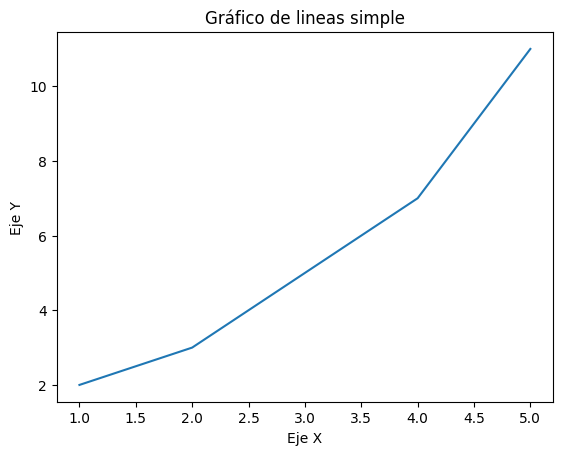

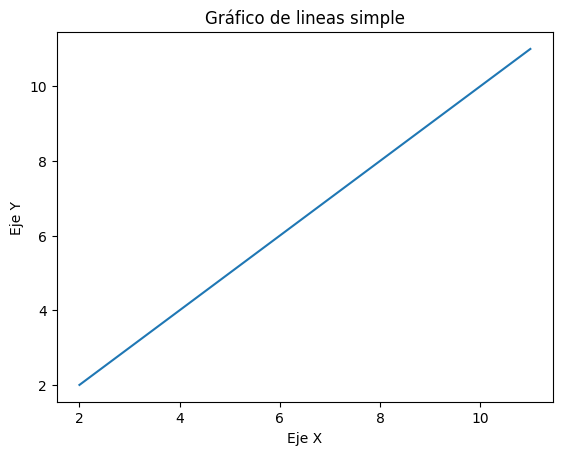

In [37]:
import matplotlib.pyplot as plt

# Gráfico de lineas simple
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.title("Gráfico de lineas simple")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()


# Gráfico de lineas simple
a = [2, 3, 5, 7, 11]
b = [2, 3, 5, 7, 11]

plt.plot(a, b)
plt.title("Gráfico de lineas simple")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()
